In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import mpmath as mp

%matplotlib inline

np.set_printoptions(linewidth=150)    #usado para as matrizes serem mais legíveis quando fizer print

# **Criação de gráficos**

## - Plot

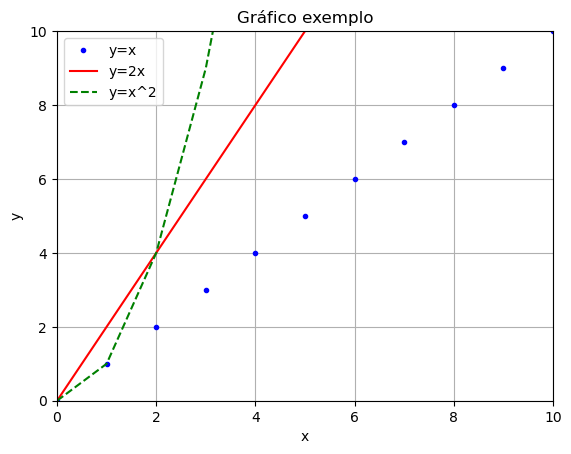

In [2]:
# Arrays
array_plot_x = np.arange(1000)
array_plot_y_1 = 1 * array_plot_x
array_plot_y_2 = 2 * array_plot_x
array_plot_y_x = array_plot_x**2


# Plot
plt.plot( array_plot_x , array_plot_y_1 , "b." , label=r'y=x')    
plt.plot( array_plot_x , array_plot_y_2 , "r-" , label=r'y=2x')    
plt.plot( array_plot_x , array_plot_y_x , "g--" , label=r'y=x^2')    
plt.legend()
plt.xlabel(r'x')
plt.ylabel(r'y')
# plt.xscale( 'log' , base=2)
# plt.yscale( 'log' , base=10)
plt.xlim(0,10)
plt.ylim(0,10)
plt.title("Gráfico exemplo")    
plt.grid(True)    
plt.show()

## - Subplots

# **Métodos de integração**

## - Método do trapézio

In [3]:
def Intgr_Trapézio( a , b , função , N ):    
    ''' 
    O que faz a função?
    Devolve o integral da função 'função' para o intervalo de integração [a,b] usando o método do trapézio com N fatias.
    O procedimento geral está presente nas páginas 142 e 143 do Newman.
    
    Parâmetros:
    - a : limite inferior do integral
    - b : limite superior do integral
    - função : função integranda
    - N : número de fatias em que o intervalo [a,b] está definido

    Return:
    - N.A. : integral (escalar) 
    '''
    # Constantes e afins 
    h = (b-a)/N
    x = np.linspace( a , b , N+1 )    #criar um array com os valores entre a e b com N intervalos
    y = função(x)    #array com todos os valores da função para o nosso x
    
    # Return
    return h * ( y[0]/2 + y[-1]/2 + y[1:-1].sum())

## - Método de Simpson

In [4]:
def Intgr_Simpson( a , b , função , N ): 
    ''' 
    O que faz a função?
    Devolve o integral da função 'função' para o intervalo de integração [a,b] usando o método de Simpson com N fatias.
    O procedimento geral está presente nas páginas 146 e 147 do Newman.
    
    Parâmetros:
    - a : limite inferior do integral
    - b : limite superior do integral
    - função : função integranda
    - N : número de fatias em que o intervalo [a,b] está definido

    Return:
    - N.A. : integral (escalar) 
    '''
    # Constantes e afins
    h = (b-a)/N
    
    x = np.linspace( a , b , N+1 )    #criar um array com os valores entre a e b com N intervalos
    y = função(x)    #array com todos os valores da função para o nosso x
    
    # Return
    return (1/3) * h * ( y[0] + y[-1] + 4*y[1:N:2].sum() + 2*y[2:N:2].sum() )

## - Integração por método de Romberg (usando método do trapézio)

In [5]:
def Intgr_Romberg( a , b , função , ϵ=1e-6 ):
    ''' 
    O que faz a função?
    Usando o método de Romberg, calcula os diferentes valores da integração da função 'função' no intervalo [a,b] para uma variedade de Ns.
    A cada linha o valor de N duplica. Atenção que a maneira como N está implementado nesta função é arbitrária; pode ser qualquer um, 
    desde que aumente com a passagem de ordem.
    O procedimento geral está presente nas páginas 160 e 161 do Newman.
    
    Parâmetros:
    - a : limite inferior do integral
    - b : limite superior do integral
    - função : função integranda
    - ϵ : erro desejado no integral

    Return:
    - matriz : array de uma matriz que contem os diferentes valores de integração, consoante N usado (array)
    '''    
    # Constantes e afins
    matriz = np.zeros( [ 2, 2 ] , dtype=np.complex128 )    #matriz que vai conter os valores dos integrais

    # Calcular R_{1,1}, R_{2,1} e R_{2,2} (ver página 160 do livro)
    #Ordem do passo
    order = 1

    #R_{1,1}, R_{2,1}
    matriz[ order-1 , 0 ] = Ingr_Trapézio( a , b , função , 2**(4 + order + 0) )    #a escolha de N é arbitrária
    matriz[ order , 0 ] = Ingr_Trapézio( a , b , função , 2**(4 + order + 1) )    #N passa a ser o dobro do valor anterior

    #R_{2,2}
    erro = ( table[1,0] - table[0,0] )  /  ( 2**(2*1) - 1 )
    matriz[ 1 , 1 ] = matriz[1,0] + erro

    # Ciclo while
    while( abs(erro) > ϵ ):    #é necessário usar abs() porque caso contrário o nosso ciclo iria acabar assim que erro<0 
        #Ordem do passo
        order += 1    

        #Preparação de matrizes
        matriz_tmp = np.copy(matriz)    #valores da matriz no passo anterior
        
        matriz = np.zeros( [ order+1 , order+1 ] , dtype=np.complex128 )    #matriz de tamanho order+1 para poder acumudar matriz_tmp
        matriz[ :order , :order ] = matriz_tmp[ : , : ]    #preencher a matriz

        #Novos elementos da matriz
        matriz[ order , 0 ] = Ingr_Trapézio( a , b , função , 2**(4 + order + 1))    #valor na primeira coluna (indíce 0)
        
        for i in range( 1 , order+1 ):    #valor à direita da coluna anterior
            erro = ( matriz[ order ,i-1 ] - matriz[ order-1 , i-1 ] )  /  ( 2**(2*i) - 1 )
            matriz[ order , i ] = matriz[ order , i-1 ] + erro    

        #Atualização do valor do erro para esta ordem
        erro = abs(    ( matriz[ order , order-1 ] - matriz[ order-1 , order-1] )  /  ( 2**(2 * order) - 1)    )

    # Return
    return matriz

## - Quadratura por polinómios de Hermite **!!!**

In [6]:
def Intgr_Hermite( função , n ):
    ''' 
    O que faz a função?
    Calcula o integral da função 'função' usando quadratura de polinómios de Hermite de ordem n.
    
    Parâmetros:
    - a : limite inferior do integral
    - b : limite superior do integral
    - função : função integranda
    - n : ordem do polinómio

    Return:
    - w @ f : valor do integral (escalar)
    '''
    # Pontos e pesos
    x , w = sp.roots_chebyt(n)

    # Adaptação devido à integranda e aos limites de integração
    xt = (a + b)/2 + (b - a)/2 * x
    f = função(xt) * np.sqrt(1 - x**2) * (b - a)/2    
    
    # Return
    return w @ f    #ordem original era f @ w
    
    #Pontos e pesos
    x , w = sp.special.roots_hermitenorm(n)
    
    #Return
    return np.dot( w , função(x) )

## - Quadratura por polinómios de Chebyshev

Usando a quadratura de Chebyshev podemos aproximar o integral por,
\begin{equation}
\int_{-1}^{1} dx \, f(x) \frac{1}{\sqrt{1 - x^2}} \approx \sum_{i = 0}^{N-1} w_i f(x_i)
\end{equation}
Onde os $w_i$ são os pesos e $x_i$ são os zeros do polinómio de ordem $N$
É possível que nem o domínio de integração é o intervalo $]-1,1[$ nem a função integranda tem o peso explicitamente. 
Para fazer a conversão basta redefinir, 
\begin{align}
\int_{a}^{b} dx g(x) & = \frac{b - a}{2} \int_{-1}^{1} dx' g\left( \frac{a + b}{2} + \frac{b - a}{2} x' \right) \\
& = \frac{b - a}{2} \int_{-1}^{1} \frac{dx'}{\sqrt{1 - {x'}^2 }} g\left( \frac{a + b}{2} + \frac{b - a}{2} x' \right) \sqrt{1 - {x'}^2} \\
& \approx \sum_{i = 0}^{N-1} w_i g\left( \frac{a + b}{2} + \frac{b - a}{2} {x_i'} \right) \sqrt{1 - {x_i'}^2}
\end{align}

In [7]:
def Intgr_Chebyshev( a , b , função , n ):
    ''' 
    O que faz a função?
    Calcula o integral da função 'função' usando quadratura de polinómios de Chebyshev de ordem n.
    Nesta função é feita a conversão para o caso em que o domínio de integração não é o intervalo [-1,1] e a função integranda não tem o
    peso explicitamente.
    O vai ao encontro da resolução do TPC1 2024.
    
    Parâmetros:
    - a : limite inferior do integral
    - b : limite superior do integral
    - função : função integranda
    - n : ordem do polinómio

    Return:
    - w @ f : valor do integral (escalar) 
    '''
    
    # Pontos e pesos
    x , w = sp.roots_chebyt(n)

    # Adaptação devido à integranda e aos limites de integração
    xt = (a + b)/2 + (b - a)/2 * x
    f = função(xt) * np.sqrt(1 - x**2) * (b - a)/2    
    
    # Return
    return w @ f    #ordem original era f @ w

# **Resolução de sistemas de equações**

## - Eliminação de Gauss (sem pivotagem)

In [8]:
def Elim_Gauss( matriz_A_original , vetor_b_original ):
    ''' 
    O que faz a função?
    Usando o método de eliminação de Gauss (sem pivotagem), determina o vetor x da equação: A x = b.
    O procedimento geral está presente nas páginas 215 a 218 do Newman.
    Este programa é uma adptação do exemplo 6.1 das páginas 218 e 219.
    
    Parâmetros:
    - matriz_A_original : matriz com os coeficientes das incognitas para cada equação (matriz A)
    - vetor_b_original : array (vetor) com os valores conhecidos (vetor b)

    Return:
    - x : array com os valores das diferentes incognitas do problema (array)
    '''
    # Constantes
    A = np.copy( matriz_A_original )    #fazemos aqui uma cópia porque caso contrário iriamos estar a afetar a própria matriz A
    b = np.copy( vetor_b_original )    #bis para vetor b
    N = len(b)

    # Eliminação de Gauss
    for m in range(N):
        #Dividir pelo elemento na diagonal
        div = A[m,m]

        A[m,:] /= div
        b[m] /= div

        #Subtrair nas linhas de baixo
        for i in range( m+1 , N ):
            mult = A[i,m]
            
            A[i,:] -= mult*A[m,:]
            b[i] -= mult*b[m]
    
    # Backsubstituiton
    x = np.empty( N , dtype=np.complex128 )    #atenção ao tipo de data escolhido! por exemplo: se resolver um sistema com valores 
                                               #complexos e x trabalhar com floats, o meu resultado vai estar errado
    for k in range( N-1 , -1 , -1 ):
        x[k] = ( b[k] - (A[k,k+1:] @ x[k+1:]) ) / A[k,k]

    # Return
    return x

## - Eliminação de Gauss (com pivotagem)

In [9]:
def Elim_Gauss_pivot( matriz_A_original , vetor_b_original ):
    ''' 
    O que faz a função?
    Usando o método de eliminação de Gauss (com pivotagem), determina o vetor x da equação: A x = b
    O procedimento geral está presente nas páginas 221 a 222 do Newman.
    
    Parâmetros:
    - matriz_A_original : matriz com os coeficientes das incognitas para cada equação (matriz A)
    - vetor_b_original : array (vetor) com os valores conhecidos (vetor b)

    Return:
    - x : array com os valores das diferentes incognitas do problema (array)
    '''
    # Constantes
    A = np.copy( matriz_A_original )    #fazemos aqui uma cópia porque caso contrário iriamos estar a afetar a própria matriz A
    b = np.copy( vetor_b_original )    #bis para vetor b
    N = len(b)

    # Percorrer os elementos da matriz
    for m in range(N):        
        #Pivotagem parcial
        A_int = np.copy( A[m:,m:] )         #matriz interior m de  A
        b_int = np.copy( b[m:] )            #vetor interior m de b
        linhas = np.arange( len(b_int) )    #linhas da matriz interior
        
        A_temp = np.copy( A_int )    #copia temporária da matriz interior. usada para trocar depois as linhas
        b_temp = np.copy( b_int )    #copia temporária do vetor interior. usada para trocar depois as linhas
        linhas_temp = np.copy( linhas )    #linhas originais (vão ser usadas como valor de referência)
        
        linha_max = np.argmax( abs( A_int[:,0] ) )    #como estamos a trabalhar com a matriz interior, a linha em avaliação é sempre a de indíce 0

        linhas[0] = linha_max                 #o indíce 0 passa a ser o índice da linha que tem o maior valor na primeira coluna
        linhas[linha_max] = linhas_temp[0]    #o índice da linha que tinha o maior valor na primeira coluna passa a ser 0

        A_int[0,:] = A_int[ linhas[0] , : ]                     #o que antes estava no indice da linha máx passa para a linha 0
        A_int[linha_max,:] = A_temp[ linhas[linha_max] , : ]    #o que antes estava no indice da lunha 0 passa para a linha máx

        b_int[0] = b_int[ linhas[0] ]                    #bis 
        b_int[linha_max] = b_temp[ linhas[linha_max]]    #bis 

        A[m:,m:] = A_int    #inserir a matriz interior na matriz original
        b[m:] = b_int    #inserir o vetor interior no vetor original

        #Eliminação de Gauss
        div = A[m,m]    #dividir pelo elemento na diagonal        
        A[m,:] /= div
        b[m] /= div

        for i in range( m+1 , N ):    #subtrair nas linhas de baixo
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            b[i] -= mult*b[m]

    # Backsubstituiton
    x = np.empty( N , dtype=b.dtype )    #atenção ao tipo de data escolhido! por exemplo: se resolver um sistema com valores
                                               #complexos e x trabalhar com floats, o meu resultado vai estar errado
    for k in range( N-1 , -1 , -1 ):
        x[k] = ( b[k] - (A[k,k+1:] @ x[k+1:]) ) / A[k,k]

    # Return
    return x

## - Decomposição LU (sem pivotagem)

In [10]:
def Decomp_LU( matriz_A_original ):
    ''' 
    O que faz a função?
    Decompõe a matriz A nas das matrizes L e U, sendo L uma matriz apenas com valores abaixo da diagonal e U uma matriz apenas com valores
    acima da diagonal.
    O procedimento geral está presente nas páginas 225 e 226 do Newman.
    
    Parâmetros:
    - matriz_A_original : matriz que desejo decompor

    Return:
    - L , A : ficamos com duas matrizes sendo 'L' a matriz L e 'A' a matriz U (matriz)
    '''
    # Constantes
    A = np.copy( matriz_A_original )    #fazemos aqui uma cópia porque caso contrário iriamos estar a afetar a própria matriz A
    N = len(A)
    L = np.zeros( [N,N] , dtype=A.dtype )

    # Percorrer os elementos da matriz
    for m in range(N):
        #Preenchimento da matriz L
        L[m:,m] = A[m:,m]

        #Dividir pelo elemento na diagonal
        div = A[m,m]
        
        A[m,:] /= div

        #Subtrair nas linhas de baixo
        for i in range( m+1 , N ):
            mult = A[i,m]
            
            A[i,:] -= mult*A[m,:]

    # Return
    return L , A    #ver que neste caso L é a matriz lower e A é a matriz upper

## - Eliminação LU (sem pivotagem)

In [11]:
def Elimin_LU( matriz_L_original , matriz_U_original , vetor_b_original ):
    ''' 
    O que faz a função?
    Resolve o sistema de equações defino a partir de A x = b usando a decomposição LU da matriz A, tal que são resolvidos dois sistemas de
    equações: L y = b  e  U x = y. 
    O procedimento geral está presente nas páginas 226 e 227 do Newman.
    
    Parâmetros:
    - matriz_L_original : matriz lower da decomposição LU da matriz A (matriz L)
    - matriz_U_original : matriz upper da decomposição LU da matriz A (matriz U)
    - vetor_b_original : array (vetor) com os valores conhecidos (vetor b)

    Return:
    - x : array com os valores das diferentes incognitas do problema (array)
    '''
    # Constantes
    L = np.copy( matriz_L_original )
    U = np.copy( matriz_U_original )
    b = np.copy( vetor_b_original )
    N = len(L)

    # Backsubstituiton de y
    y = np.empty( N , float )

    for k in range( N ):
        y[k] = ( b[k] - (L[k,:k] @ y[:k]) ) / L[k,k]

    # Backsubtituiton de x
    x = np.empty( N , dtype=A.dtype )

    for k in range( N-1 , -1 , -1 ):
        x[k] = ( y[k] - (U[k,k+1:] @ x[k+1:]) ) / U[k,k]

    # Return
    return x

## - Eliminação de Gauss para matrizes de bandas    **!!!**

## - Decomposição QR

In [12]:
def Decomp_QR( A_original ):
    ''' 
    O que faz a função?
    Decompõe a matriz A nas das matrizes Q e R, sendo Q uma matriz ortogonal e R uma matriz triangular superior.
    O procedimento geral está presente na páginas 246 e 247 do Newman.
    
    Parâmetros:
    - matriz_A_original : matriz que desejo decompor

    Return:
    - Q , R : ficamos com duas matrizes sendo 'Q' a matriz Q e 'R' a matriz R 
    '''
    # Constantes
    A = np.copy( A_original )
    N = len( A )
    U = np.zeros( [N,N] , dtype=A.dtype )
    Q = np.zeros( [N,N] , dtype=A.dtype )
    R = np.zeros( [N,N] , dtype=A.dtype )

    # Valores de q_{i} e u_{i} 
    for i in range(N):
        #Determinar u_{i}
        U[:,i] = A[:,i]

        for j in range(i):
            U[:,i] -= np.dot( Q[:,j] , A[:,i] ) * Q[:,j]

        #Determinar q_{i}
        Q[:,i] = U[:,i] / np.linalg.norm(U[:,i]) 

    #Contruir a matriz R
    R = Q.T @ A    

    # Return
    return Q , R

## - Determinação de valores prórpios e vetores próprios

In [13]:
def Algort_QR( A_original , ϵ_user=1e-6 ):
    ''' 
    O que faz a função?
    O procedimento geral está presente na páginas 244 do Newman.
    
    Parâmetros:
    - matriz_A_original : matriz que desejo decompor
    - ϵ_user : precisão desejada para os elementos fora da ortogonal

    Return:
    - np.diagonal(A) , V : ficamos com dois arrays: 'np.diagonal(A)' representa na forma de array os valores próprios da matriz A
    e 'V' é uma matriz com os vetores próprios da matriz A em cada coluna. 
    '''
    # Constantes e afins
    A = np.copy( A_original )
    N = len( A )
    V = np.identity( N , dtype=A.dtype )
    contador = 0

    # Ciclo de diagonalização
    while np.linalg.norm(A - np.diag(np.diagonal(A))) > ϵ_user:
    # while (  A - np.diag(np.diagonal(A))  ) > ϵ_user or contador<1000:
        Q , R = Decomp_QR( A )    #calculate de QR decomposition A=QR
        V_temp = np.copy( V )
        
        A = R @ Q    #update A to the new value A=RQ
        V = V_temp @ Q    #multuply V on the right by Q
    
    # Return
    return np.diagonal(A) , V

## - Método de relaxação

In [14]:
def Mét_relax( f , df , ϵ_user=1e-6 ):
    ''' 
    O que faz a função?
    A partir de um valor inicial definido dentro do programa (x1=1.0), iremos procurar a raiz da função que está a ser usada a menos de
    um erro definido pelo utilizador (ϵ_user). O processo nem sempre converge.
    A cada passo, iremos verificar se o erro entre a nova estimativa de raiz e a nova estimativa são inferiores do que a incerteza desejada
    , sendo usada a expressão (6.83) do Newman.
    
    Parâmetros:
    - f : função cuja raiz queremos determinar
    - df : derivada da função que está a ser usada
    - ϵ_user : precisão desejada para os elementos fora da ortogonal

    Return:
    - x1 : o valor mais aproximado da raiz dentro do parâmetro de erro estabelecido. 
    '''
    # Constantes
    x1 = 1.0
    ϵ = 1.0 

    # Ciclo while
    while ϵ > ϵ_user:
        x1 , x2 = f(x1) , x1
        ϵ = abs(  (x1-x2) / ( 1 - (1/df(x1)) )  )

    #Return
    return x1

## - Método de sobre-relaxacão

In [15]:
def Mét_sobrrelax( f , df , ω , ϵ_user=1e-6 ):
    ''' 
    O que faz a função?
    De forma semelhante ao método de relaxação, a partir de um valor inicial definido dentro do programa (x1=1.0), iremos procurar a raiz
    da função que está a ser usada a menos de um erro definido pelo utilizador (ϵ_user). Novamente, o processo nem sempre converge.
    Neste método, ao vermos que o nosso valor de x está, por exemplo, a aumentar vamos avaliar o erro para um valor de x maior do que 
    aquele que iriamos usar originalmente (para uma raiz em x=5, se de x=1 passassemos para x=3, no método de sobre-relaxação passámos
    para x=4).
    Um parâmetro extra desta função relativamente ao método de relaxação é ω. Caso este parâmetro seja 0, temos o mesmo procedimento que o
    método de relaxação, mas para ω>0 o método pega na quantidade Δx pelo qual x teria variado e muda-o um pouco mais.
    
    Parâmetros:
    - f : função cuja raiz queremos determinar
    - df : derivada da função que está a ser usada
    - ω : taxa de overshoot (não há uma boa maneira de saber de imediato este valor; tem de ser determinado pelo utilizador com testes)
    - ϵ_user : precisão desejada para os elementos fora da ortogonal

    Return:
    - x1 : o valor mais aproximado da raiz dentro do parâmetro de erro estabelecido. 
    '''
    # Constantes
    x1 = 1.0
    ϵ = 1.0 
    i = 0    #número de iterações necessárias

    # Ciclo while
    while ϵ > ϵ_user:
        i += 1    #foi necessária mais uma iteração
        x1 , x2 = f(x1) , x1
        ϵ = abs(    (x1-x2) / (   1 - (  1/( (1+ω)*df(x1)-ω )  )   )    )

    #Return
    return x1 , i

## - Método de bisseção

In [16]:
def Mét_biseção( x1 , x2 , função , ϵ_user=1e-6 ):
    ''' 
    O que faz a função?
    O método de bisseção é uma forma de determinar a raiz de uma função (função) dentro do intervalo [x1,x2] definido pelo utilizador a
    menos de um erro (ϵ_user). 
    O algoritmo verifica se o produto entre f(x1) e f(x2) é negativo, como a função é considerada contínua deve existir uma raiz nesse
    intervalo; caso não exista uma raiz, o programa dá print a uma mensagem. Com cada passo do processo, iremos escolher um novo ponto de
    avaliação. Avaliando o produto entre esse os valores de x1 e esse novo x na função, iremos atribuir uma nova designação a cada ponto,
    havendo um certo 'shift' à medida que nos aprocimamos do zero da função.
    Uma escolha prévia do intervalo pode ser realizada fazendo um plot da função.
    
    Parâmetros:
    - x1 : valor à esquerda do zero
    - x2 : valor à direita do zero
    - função : função em estudo
    - ϵ_user : precisão desejada para a raiz

    Return:
    - 0.5*(x1+x2) : valor mais aproximado da raiz dentro do parâmetro de erro estabelecido. 
    '''
    # Condição de entrada
    if função(x1) * função(x2) > 0:
        print('Não existe uma raiz dentro do intervalo selecionado.')
    else:
        #Ciclo while
        while ϵ_user > abs(x1-x2):
            x_ = 0.5*(x1+x2)

            if função(x_)*função(x1)>0:    
                x1 = x_    #if f(x') has the same sign as f(x1) then set x1=x'
            else:
                x2 = x_    #otherwise set x2=x'

    # Return
    return 0.5*(x1+x2)

##  - Método de Newton / Newton-Raphson

In [17]:
def Mét_Newton( x , f , df , ϵ_user=1e-6 ):
    ''' 
    O que faz a função?
    O método de Newton usa a estimativa da raiz, x, e usa a o declive desse ponto na função f para extrapolar uma melhor estimativa x'. 
    Este procedimento repete-se até a diferença entre estimativas sucessivas for menor ou igual que a precisão desejada.
    
    Parâmetros:
    - x : estimativa inicial da raiz
    - f : função cuja raiz queremos determinar
    - df : derivada da função em questão
    - ϵ_user : precisão desejada para a raiz

    Return:
    - x : valor mais próximo da raiz da função para o erro ϵ_user
    '''
    # Constantes
    ϵ = 1.0

    #Ciclo while
    while abs(ϵ)>ϵ_user:
        x_ = x - ( f(x) / df(x) )    #cálculo de x'
        
        ϵ = x-x_    #atualização do valor do erro (não conta o passo final, apenas e incluíndo o penúltimo)
        
        x = x_    #atualização do valor de x para um possível futuro passo

    # Return
    return x

## - Método de Secante

In [18]:
def Mét_secante( x1 , x2 , função , ϵ_user=1e-6 ):
    ''' 
    O que faz a função?
    O funcionamento deste método é semelhante àquele executado no método de Newton, a grande diferença está no facto de que não precisamos
    de saber a derivada da função em questão. É feita uma aproximação do declive da função que será usado para obtermos uma melhor 
    estimativa da raiz.
    
    Parâmetros:
    - x1 : um valor qualquer (dentro de razão) 
    - x2 : um valor qualquer (dentro de razão)
    - função : função cuja raiz queremos determinar
    - ϵ_user : precisão desejada para a raiz

    Return:
    - x : valor mais próximo da raiz da função para o erro ϵ_user
    '''
    # Constantes
    ϵ = 2*ϵ_user
    N_ciclos = 0

    #Ciclo while
    while ϵ>ϵ_user and N_ciclos<N_max:
        x3 = x2 - função(x2) * (x2-x1)/( função(x2)-função(x1) )
        
        ϵ = abs(x3-x2)    #atualização do valor do erro (não conta o passo final, apenas e incluíndo o penúltimo)
        N_ciclos += 1    #atualização do número de ciclos percorridos
        
        x1 = x2 
        x2 = x3    #atualização dos valores x's para um possível futuro passo

    # Return
    return x1

## - Método de Newton para >1 dimensões    **!!!**

## - Máximo e mínimo    **!!!**

# **Transformadas de Fourier**

## - Transformada de Fourier (discreta)

In [19]:
def DFT( y ):
    '''
    O que faz a função?
    Indica os coeficientes (complexos) de uma transformada de Fourier para a série discreta de elementos no array y
    
    Parâmetros:
    - y : array com os valores do sinal cujos coeficientes da transformada de Fourier queremos determinar 

    Return:
    - c : array contendo os coeficientes da transformada de Fourier queremos determinar
    '''
    # Constantes
    N = len(y)
    c = np.zeros( N//2+1 , complex )    #array que irá guardar os coeficientes 

    # Cálculo dos coeficientes
    for k in range( N//2+1 ):
        for n in range(N):    #sumatório
            c[k] += y[n] * np.exp(-2j*np.pi*k*n/N)
    
    # Return
    return c

## - Inversa da transformada de Fourier (discreta)   **!!!**

# **Equações diferenciais ordinárias (ODEs)**

## - Método de Runge-Kutta de 4ª ordem

In [20]:
def RK4( função , x0 , a , b , N ):
    '''
    O que faz a função?
    Usando o método de Runge-Kutta de 4ª ordem, determina os diferentes valores da equação solução da equação diferencial ordinária para
    o intervalo de tempo em questão. 
    
    Parâmetros:
    - f : corresponde à derivada no tempo da função que nos interessa
    - x0 : condição inicial
    - a : início do intervalo de tempo
    - b : fim do intervalo de tempo
    - N : número de parcelas 

    Return:
    - tpoints : array com os diferentes valores do tempo (equiespaçados)
    - xpoints : array com os diferentes valores da equação solução da equação diferencial ordinária para o intervalo de tempo em questão  
    '''
    #Constantes
    h = (b-a)/N
    tpoints = np.arange( a , b , h )
    xpoints = np.zeros( len(tpoints) )
    x = x0
    
    #Percorrer pontos
    for i,t in enumerate(tpoints):
        xpoints[i] = x

        k1 = h * função( x , t ) 
        k2 = h * função( x+0.5*k1 , t+0.5*h ) 
        k3 = h * função( x+0.5*k2 , t+0.5*h ) 
        k4 = h * função( x+k3 , t+h ) 

        x += (k1 +2*k2 + 2*k3 + k4) / 6

    # Return
    return tpoints , xpoints

## - Método de Runge-Kutta de 4ª ordem para intervalos infinitos

In [21]:
def RK4_infinite( função_g , x0 , N ):
    '''
    O que faz a função?
    Usando o método de Runge-Kutta de 4ª ordem, determina os diferentes valores da equação solução da equação diferencial ordinária desde 
    0 até inf. É feita uma troca de variável que, para ser sincero, é melhor entendida ao ler a página 341 e 342
    
    Parâmetros:
    - função_g : relaciona-se com a derivada no tempo da função que nos interessa como é indicado pela equação (8.24)
    - x0 : condição inicial
    - N : número de parcelas 

    Return:
    - tpoints : array com os diferentes valores do tempo (equiespaçados)
    - xpoints : array com os diferentes valores da equação solução da equação diferencial ordinária para o intervalo de tempo em questão  
    '''
    #Constantes
    a = 0.0
    b = 1.0
    h = (b-a)/N
    upoints = np.arange(a,b,h)
    tpoints = np.arange( a , b , h )
    xpoints = np.zeros( len(tpoints) )
    x = x0
    
    #Percorrer pontos
    for i,u in enumerate(tpoints):
        tpoints[i] = u/(1-u)
        xpoints[i] = x

        k1 = h * função_g( x , u ) 
        k2 = h * função_g( x+0.5*k1 , u+0.5*h ) 
        k3 = h * função_g( x+0.5*k2 , u+0.5*h ) 
        k4 = h * função_g( x+k3 , u+h ) 

        x += (k1 +2*k2 + 2*k3 + k4) / 6

    # Return
    return tpoints , xpoints

## - Método de Runge-Kutta de 4ªa ordem para duas coordenadas

In [22]:
def f(r,t):
    '''
    O que faz a função?
    Usando notação vetorial, representa a derivada no tempo do vetor r. Ver página 344.
    
    Parâmetros:
    - r : array com as diferentes coordenadas (x1,x2...,xn,x'1,x'2,...,x'n)
    - t : valor de tempo

    Return:
    - np.array( [fx,fy] ) : array com os valores das derivadas de interesse para esse instante   
    '''
    # Coordenadas do vetor posição
    x = r[0]
    y = r[1]

    # Derivada de cada componente no tempo
    fx = #
    fy = 

    # Return
    return np.array( [fx,fy] , dtype=float )    #!!!



def RK4_multi( função , x0 , y0 , a , b , N ):    #aqui a função é definida como é descrito em 344 e 345
    '''
    O que faz a função?
    Usando o método de Runge-Kutta de 4ª ordem, determina os diferentes valores da equação solução de duas variáveis da equação
    diferencial ordinária para o intervalo de tempo em questão. 
    
    Parâmetros:
    - função : refere-se a f(r,t) 
    - x0 : condição inicial de x0
    - y0 : condição inicial de y'
    - a : início do intervalo de tempo 
    - b : fim do intervalo de tempo
    - N : número de valores para o intervalo

    Return:
    - tpoints : array dos diferentes valores do intervalo de tempo
    - xpoints : valores de x em função do tempo
    - ypoints : valores de y em função do tempo
    '''
    #Constantes
    h = (b-a)/N
    tpoints = np.arange( a , b , h )
    xpoints = np.zeros( len(tpoints) )
    ypoints = np.zeros( len(tpoints) )
    r = np.array( [x0,y0] , dtype=float )    #!!!
    
    #Percorrer pontos
    for i,t in enumerate(tpoints):
        xpoints[i] = r[0]
        ypoints[i] = r[1]

        k1 = h * função( r , t ) 
        k2 = h * função( r+0.5*k1 , t+0.5*h ) 
        k3 = h * função( r+0.5*k2 , t+0.5*h ) 
        k4 = h * função( r+k3 , t+h ) 

        r += (k1 +2*k2 + 2*k3 + k4) / 6

    # Return
    return tpoints , xpoints , ypoints

SyntaxError: invalid syntax (1306040878.py, line 18)

# **Equações diferenciais parciais**

## - Método de Jacobi    **!!!**

## - Método de Gauss-Seidel

In [ ]:
def Mét_Gauss_Seidel( A , ϵ=1e-6 , ω=0.9 ):
    '''
    O que faz a função?
    Usando o método de Gauss-Seidel, determina os valores da função em estudo cujos valores são expressos pela matriz A.
    A parte importante deste método são as restrições! Ver linha 18 e Notebook da série 8 caso sejam necessário mais exemplos.
     
    
    Parâmetros:
    - A : matriz que irá conter os valores da função
    - ϵ : precisão desejada 
    - ω : valor de ω a usar
    
    Return:
    - A : matriz com os valores da função
    '''
    # Constantes
    maior_diff = 1

    # Procedimento de Gauss-
    #Ciclo while
    while maior_diff > ϵ:
        #Reset ao valor de maior_diff para a nova avaliação da grelha
        maior_diff = 0

        #Percorrer a grelha
        for i in range( len(A) ):
            for j in range( len(A) ):
                if #restrição or #restrição or #restrição or #restrição:
                    pass
                else:
                    A_antes = A[i,j]
                    
                    A[i,j] = ((1+ω)/4)  *  (A[i+1,j] + A[i-1,j] + A[i,j+1] + A[i,j-1])  -  ω*A[i,j]

                    A_depois = A[i,j]

                    #Qual a maior diferença para este valor 
                    maior_diff = max( maior_diff , abs(A_depois-A_antes)  )

    # Return
    return A